# Polynomial Regression

y = b0 + b1*x1 + b2*x1^2 + b3*x1^3 + ......

only 1 independent variable but in different powers

it is a special case of multiple linear regression, not anything new

why it's c/a polynomial 'linear' regression? bcoz even though powers are there, linear regression class
is concerned with coefficients of these 'x', i.e. whether by plugging those 'x', can y be displayed as
a linear combination of coeff's

non-linear eq. would be when the coeff cannot be replaced to make the equation a linear one

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

# why 1:-1 columns in X? bcoz in the dataset, the first 2 cols are redundant i.e. basically numerical 
# values ('level' column) given to 'position' col, so we drop the first col, hence start with index 1 and as
# usual leave the last column bcoz that's for y [upper bound of range is excluded in python]

## Training the Linear Regression model on the whole dataset

In [4]:
# why doing linear regression here? just to compare it with polynomial one and see how much better
# it performs, not a necessary thing to do for the polynomial regression, just for our sake of understanding

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

# why we did not split the data? bcoz the dataset we have is too small & only of 10 observations,
# hence it's better to just train the model on the whole dataset

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

# So, first step is to get a polyonmial matrix of our features i.e. x1 & x1^2 (till square bcoz we took degree = 2)
# poly_reg is just the instance of the class PolynomialFeatures which takes degree as argument
# we store this new features matrix in X_poly using fit_transform
# then we just create a new linear regression model using the polynomial features matrix & dependent var 'y'

LinearRegression()

## Visualising the Linear Regression results

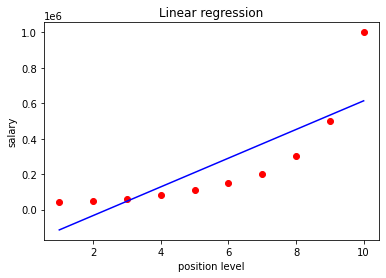

In [7]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Linear regression')
plt.xlabel('position level')
plt.ylabel('salary')
plt.show()


In [8]:
# we can see in the result that our linear regression line is not adapted well to the dataset, for
# such cases we use polynomial regression

## Visualising the Polynomial Regression results

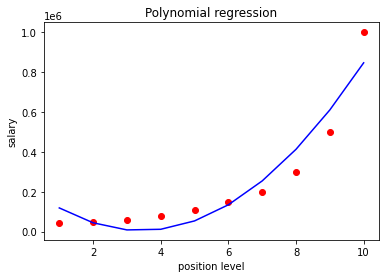

In [9]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Polynomial regression')
plt.xlabel('position level')
plt.ylabel('salary')
plt.show()

# X_poly = poly_reg.fit_transform(X) ; as argument here in predict func., which is our new polynomial matrix of features

In [10]:
# for degree =2 , model is performing quite well as data-points are quite close to the line,
# however, to perform even more better, increase the degree by 3 or 4 or more. i.e. b0 + b1*x1 + b2*x1^2 + b3*x1^3 (degree=3)

In [11]:
# to make the curve smoother and better resolution, code is present in the original ipynb of this folder
# the approach is to basically have a density of points with just 0.1 gap line 0.1,0.2,0.3 & so on.

## Predicting a new result with Linear Regression

In [12]:
lin_reg.predict([[6.5]])

# so for 6.5 level, we get around 330k salary, which is a very bad prediction acc to the straight linear regression line

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [13]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

# here we get around 190k, which is close to our result, hence our non-linear model is performing well.

array([189498.10606061])